# Assignment 2 - Natural Disasters Dataset

Author: Anna Lee

Date: 2022-12-01

## Data Exploration of the Natural Disasters Datatset

In [1]:
import os 
import pandas as pd
import numpy as np 
import re

import seaborn as sns 
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

print('Shape of train dataset:', train.shape)
print('Shape of test dataset:', test.shape)


Shape of train dataset: (7613, 5)
Shape of test dataset: (3263, 4)


In [3]:
# Check out the train dataset 
train.info()
print(train['target'].value_counts())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
0    4342
1    3271
Name: target, dtype: int64


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
# Check out the train dataset 
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
# Sample tweets labeled 1
print('Real disaster tweets:')
disaster_tweet = train.query('target==1')[['text']].sample(10)
for i in disaster_tweet.iterrows():
    print(disaster_tweet.loc[i[0], 'text'], '\n')



Real disaster tweets:
@JohnFromCranber  Pleas FOR global warming don't really work when California / Australia keep having catastrophic 'bush' fires. 

Ignition Knock (Detonation) Sensor-Senso Standard KS94 http://t.co/IhphZCkm41 http://t.co/wuICdTTUhf 

Why did I come to work today.. Literally wanna collapse of exhaustion 

@robbiewilliams U fkn asswipe playing for Israeli child killers.. The fkn karma police will get U. 

@WaseemBadami Condemning of Deaths More than 1000 due to Heat Wave in Karachi. 
May Allah gv Patience to their Heirs. http://t.co/iTG84q7vIi 

Esteemed journalist recalls tragic effects of unaddressed #childhood #trauma. @keithboykin @RandallPinkston @pozarmy  http://t.co/GXq1Auzb18 

??
Warfighting Robots Could Reduce Civilian Casualties So Calling for a Ban Now Is Premature - IEEE Spectrum http://t.co/TzR58B86qz 

Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/02ELqLOpFk 

@115Film Doct

In [6]:
# Sample tweets labeled 0 
print('Not a disaster tweet:',)
non_disaster_tweet = train.query('target==0')[['text']].sample(10)
for i in non_disaster_tweet.iterrows():
    print(non_disaster_tweet.loc[i[0], 'text'], '\n')



Not a disaster tweet:
Please please u gotta listen to @leonalewis # essenceOfMe and thunder it's major
#she's #back ???????? 

Don't think I Can take anymore emotional wreck watching @emmerdale #SummerFate @MikeParrActor @MissCharleyWebb 

'Save me from my self don't let me drown'. 

Damn greinke got blown up in that first inning 

It's baaaack!  Petersen's Bowhunting Battle of the Bows.  Make sure you head on over and cast your vote for your... http://t.co/FJ73gDvg2n 

Drake is really body bagging meek 

FedEx no longer will transport bioterror germs http://t.co/qfjjDxes7G via @USATODAY 

Vanderbilt: First Do No Harm http://t.co/cCdx7CGlQW 

Rise up like a natural disaster we take the bat and then we take back the town???? 

Megadeth Week - Symphony Of Destruction http://t.co/ECd7HiZja1 



In [7]:
print(train['keyword'].value_counts())
fatalities = train.query('keyword=="fatalities"')

print('\n')
print(fatalities.query('target==1').sample(5)['text'])
print('\n')
print(fatalities.query('target==0').sample(5)['text'])

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64


3629    Injuries Illnesses and Fatalities Latest Numbe...
3637    -??-\n; kitana\n? her fatalities slay me\nÛÓk...
3642    Govt allocating 1.3 bn for flood action: Issue...
3656    PolicyLab is at @CECANF's last public hearing ...
3653    ...American casualties including 400000ÛÒ8000...
Name: text, dtype: object


3622    @kyrikoni @ExpressandStar Who said veg and fru...
3619    Las Vegas in top 5 cities for red-light runnin...
3634    mortal kombat fatalities are so gross but inte...
3646    Sharing to help our cousin's family http://t.c...
3630     http://t.co/JwIv6WYW6F Osage Beach releases name
Name: text, dtype: object


In [8]:
multitweets = train.groupby(['text']).agg({
    'target':'nunique'
}).reset_index()

multitweets.head()


,text,target
0,! Residents Return To Destroyed Homes As Washi...,1
1,# handbags Genuine Mulberry Antony Cross Body ...,1
2,#360WiseNews : China's Stock Market Crash: Are...,1
3,#360WiseNews : China's Stock Market Crash: Are...,1
4,#360WiseNews : China's Stock Market Crash: Are...,1


In [9]:
indices = train[train['text'].str.contains('#360WiseNews')].index
for idx in indices:
    print('Headline:', train.loc[idx, 'text'])
    print('Label:', train.loc[idx, 'target'])

Headline: #360WiseNews : China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/eaTFro3d5x
Label: 0
Headline: #360WiseNews : China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/9Naw3QOQOL
Label: 1
Headline: #360WiseNews : China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/aOd2ftBMGU
Label: 1
Headline: #360WiseNews : China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/gQskwqZuUl
Label: 0


Based on a scan of the tweets labeled 1 (real disaster) and 0 (not a real disaster), there appear to be some tweets that could be mislabeled. For example, one of the tweets labeled 1 said "Didnt expect Drag Me Down to be the first song Pandora played" (see below for example), which is unlikely to be an actual disaster. This could affect accuracy when trying to classify the tweets as some non-disaster tweets are mixed in with the real disaster tweets. 

In addition, there are certain tweets where the tweet content is the same, e.g. "China's Stock Market Crash: Are There Gems in the Rubble?"; however, the tweets are not labeled consistently. Two of the 4 tweets with this sentence are labeled as not disasters while the other two are labeled as real disasters. For the purposes of this notebook, I will leave these in for now; however, with additional time or if a more accurate model is required, it would be necessary to go through the tweets and remove duplicates and ensure consistency among the target labels. 

The ratio of the classes are not completely balanced with the ratios standing at ~57% labeled 0 and ~43% labeled 1. For the purposes of this classification exercise, I will also not use the keyword and location values. The same keywords are used for both tweets about real disasters and non-disasters. In addition the keyword may appear in the tweet itself and may just add redundancy to the dataset. 

In [10]:
# Example of a possibly mislabeled tweet
train.loc[5918, 'text']

'OMFG??\nDidnt expect Drag Me Down to be the first song Pandora played \n\nOMFG I SCREAMED SO LOUD\nMy coworker is scared http://t.co/VzcvAdkcQp'

### Task 1 - Bag of Words Model
#### Text preprocessing

The Bag of Words model is one of the simplest NLP models to use. It takes text as input and converts those words into vectors by counting the frequency of the words in the documents. To improve the model, it is necessary to remove redundancy or noise in the data before using the Bag of Words model for classification. An example of noise could be stop words or punctuation. The Bag of Words model is not able to pick up sentiment as it is merely a count of the frequency, so removing these details (e.g. punctuation) should not negatively impact the model.  

In terms of preprocessing I will be processing the text as follows:
- removal of links (starting with http) 
- removal of punctuation
- removal of non-ascii characters - certain letters apear to be accented, these could be actual accented letters but from the exploration they look to be certain symbols/emojis that were converted to text strangely and it would be better to remove them 
- remove twitter handles (words starting with @)
- removal of digits 
- removal of additional white spaces or single characters that may be left over from other preprocessing

The reason for removing/replacing the above is to reduce the noise in the dataset. Every word will be put into the Bag of Words model when the texts are passed into it. Not removing these words or characters would increase the vocabulary of the model, not only adding noise, but also increasing the sparsity of the resulting matrix output. This would make it more difficult to compute the result when passing this sparse matrix to a classfier. 

**Note**: There may be duplicates of the tweets in the dataset, especially after preprocessing the text to remove certain details (e.g. links). For the sake of time, I will leave these in for now, as this may require further review to determine whether these are actually duplicates or not. 

In [11]:
# Process text

# create a copy of the train to keep the original as is
X_processed = train.copy()

# Lower case all tweets
X_processed['text'] = X_processed['text'].str.lower()

# remove links from the tweets
X_processed['text'] = X_processed['text'].str.replace(r'(http\S+)', '', regex=True)

# remove twitter handles
X_processed['text'] = X_processed['text'].str.replace(r'(@\S+)', '', regex=True)

# remove the apostrophes and replace with no space to retain contractions 
X_processed['text'] = X_processed['text'].str.replace("'", "", regex=False)

# remove all non-ascii characters
X_processed['text'] = X_processed['text'].str.replace(r'([^\x00-\x7F]+)', ' ', regex=True)

# remove all periods 
X_processed['text'] = X_processed['text'].str.replace('\.', '', regex=True)

# remove all underscores 
X_processed['text'] = X_processed['text'].str.replace(r'(_+)', ' ', regex=True)

# remove all digits
X_processed['text'] = X_processed['text'].str.replace(r'(\d+)', '', regex=True)

# remove non-word characters
X_processed['text'] = X_processed['text'].str.replace(r'(\W)', ' ', regex=True)

# remove excess spaces and replace with one space
X_processed['text'] = X_processed['text'].str.replace(r'(\s+)', ' ', regex=True)

# strip all trailing whitespaces
X_processed['text'] = X_processed['text'].str.strip()


In [12]:
# Check if processing text has worked
test_processed = X_processed[['text']].sample(10)
for i in test_processed.iterrows():
    print(test_processed.loc[i[0], 'text'], '\n')
    print(train.loc[i[0], 'text'], '\n')

japan heat wave intensifies death toll surges to 

Japan Heat Wave Intensifies ÛÒ Death Toll Surges To 55  http://t.co/irpSSresRq 

then find cougars who look like her even better if theyre in military uniform 

@FurTrix then find cougars who look like her even better if they're in military uniform! 

your bf gf crush 

'@jorrynja: 6. @ your bf/gf/crush ??' @Ter_ell ?? 

pt the unit attacked by is was responsible for targeting muslim scholars and imprisoning the youth 

#PT: The unit attacked by IS was responsible for targeting Muslim Scholars and imprisoning the youth. http://t.co/f4LhfmEhzh 

debatequestionswewanttohear if u start another war would u b willing go the war zone yourself or send ur sons and or daughters fight 

#DebateQuestionsWeWantToHear If U start another war would U B willing 2 go 2 the war-zone yourself or send UR sons and/or daughters 2 fight? 

i went to pick up my lunch today and the bartender was holding my change hostage because he wanted my number 

I went t

### Training the Model

In [13]:
# use count vectorizer to vectorize the words and then 
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 


# Split the training set first
# Fit and transform the X_train dataset 
# Then transform the X_test using the fitted parameters from X_train
tokenizer = TweetTokenizer()

X = np.array(X_processed['text']) 
y = np.array(X_processed['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

ratio_train = y_train.sum()/len(y_train)
print('Distribution ratio - train:', ratio_train)
ratio_test = y_test.sum()/len(y_test)
print('Distribution ratio - test:', ratio_test)

# The data has been split and roughly matches the distribution of the original dataset

Distribution ratio - train: 0.43253893788703324
Distribution ratio - test: 0.42294220665499127


In [14]:
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(stop_words = stop_words, tokenizer = lambda text: tokenizer.tokenize(text))

#docs = np.array(X_processed['text'])
X_train_bag = vectorizer.fit_transform(X_train)
X_test_bag = vectorizer.transform(X_test)
print('Size of vocabulary:', X_train_bag.shape)
#vectorizer.get_feature_names()

vectorizer.get_feature_names()[:10]


Size of vocabulary: (5329, 11505)


C:\Users\anne_\Anaconda3\envs\trupanion\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaaa',
 'aaaaaaallll',
 'aaarrrgghhh',
 'aal',
 'aan',
 'aannnnd',
 'aar',
 'ab',
 'aba']

From looking at the vectorizer feature names, it seems that there are words that are not actually words or spelled incorrectly. For example, there are a few words that are spelt in such a way to emphasize prolonged emphasis (e.g. "aaarrrgghhh"). This may add noise to the dataset and may affect how the models classify the text.

In [15]:
# for now, use a simple logistic regression model to predict the classes
clf = LogisticRegression(random_state=0)
clf.fit(X_train_bag, y_train)
y_pred = clf.predict(X_test_bag)

print('Accuracy score: %.3f' %metrics.accuracy_score(y_test, y_pred) )



Accuracy score: 0.800


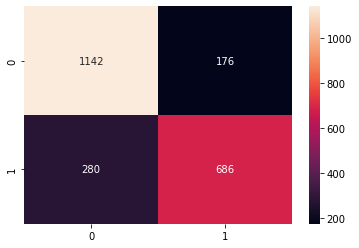

In [16]:
# Confusion matrix illustrating the hit rate of the model 
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.show()

ROC-AUC score: 0.855


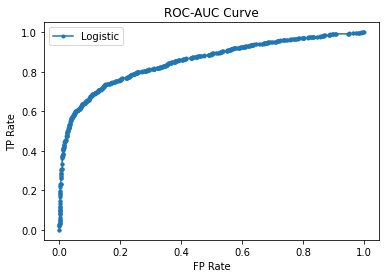

In [17]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

# the predict_proba function will output probabilities for both classes
# when using the roc_auc_score, only use the positive outcome probabilities
y_probs_bag = clf.predict_proba(X_test_bag)[:,1]
lr_bag_roc_auc = roc_auc_score(y_test, y_probs_bag) 
print('ROC-AUC score: %.3f' %lr_bag_roc_auc)

lr_bag_fpr, lr_bag_tpr, _ = roc_curve(y_test, y_probs_bag)

plt.plot(lr_bag_fpr, lr_bag_tpr, marker = '.', label='Logistic')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()
# y_test.shape
# y_probs.shape

Logistic f1: 0.751, auc: 0.848


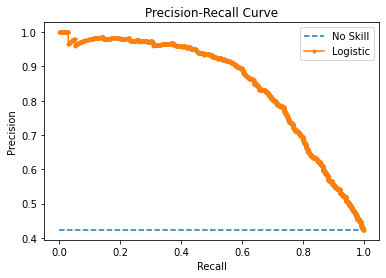

In [18]:
# precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc 

lr_bag_precision, lr_bag_recall, _ = precision_recall_curve(y_test, y_probs_bag)
lr_bag_f1 = f1_score(y_test, y_pred)
lr_bag_auc = auc(lr_bag_recall, lr_bag_precision)

print('Logistic f1: %.3f, auc: %.3f' % (lr_bag_f1, lr_bag_auc))
no_skill = len(y_test[y_test==1])/len(y_test)

plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_bag_recall, lr_bag_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

After creating the bag of words model, I applied a logistic regression classifier to the vectorized data. The model achieved an accuracy of 80%. I also evaluated and plotted other parmeters such as the ROC curve, AUC, F1 score and the precision-recall curve. The ROC and precision-recall shows how well the model performs at various classification thresholds, while the precision-recall curve illustrates the tradeoff between precision and recall at various thresholds. A precision-recall curve is mainly used for majorly imbalanced classes, but I provided the plot for additional insight. A model is performing relatively well if the ROC curve is closer to the top-left corner. A high area under the curve for the precision-recall curve also indicates higher precision and higher recall. Based on the plots above, the model performs relatively well and is at least better than a model that guesses randomly.

### Task 2 - Feature Generation and Traditional ML Model

For this task, I will use the same processed text as earlier though I will use a different vectorizer. I will also look at 3 different types of classifiers, LinearSVC, Logistic Regression and a MultinomialNB. I will evaluate which classifier is the best upon looking at the relevant metrics (e.g. accuracy, precision, recall, f1-score, auc, etc.). Typically in these cases where there may be a large number of features compared to the number of samples, Logistic Regression and SVMs with linear kernels will perform better. 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB

# will try out LogisticRegression, MultinomialNB and LinearSVC to see which produces the best results

# will try a TFIDF vectorizer 
tfidf_vectorizer = TfidfVectorizer(use_idf=True, stop_words=stop_words, tokenizer = lambda text: tokenizer.tokenize(text))

svc = LinearSVC(random_state=0)
nb = MultinomialNB()
lr = LogisticRegression(random_state=0)

In [20]:
# apply tfidfvectorizer on processed text 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [21]:
# Predict probabilities using SVC
svc.fit(X_train_tfidf, y_train)
y_pred_svc = svc.predict(X_test_tfidf)
svc_clf = CalibratedClassifierCV(svc)
svc_clf.fit(X_train_tfidf, y_train)
y_probs_svc = svc_clf.predict_proba(X_test_tfidf)[:, 1]


# Predict probabilities using MultinomialNB
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
y_probs_nb = nb.predict_proba(X_test_tfidf)[:,1]


# Predict probabilities using LogisticRegression
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
y_probs_lr = lr.predict_proba(X_test_tfidf)[:,1]

y_pred_clfs = [y_pred_svc, y_pred_nb, y_pred_lr]
y_probs_clfs = [y_probs_svc, y_probs_nb, y_probs_lr]

accuracy_scores = []
for clfs in y_pred_clfs:
    accuracy_scores.append(metrics.accuracy_score(clfs, y_test))

models = ['SVC', 'NB', 'LR']
for i in range(len(models)):
    print('Accuracy scores for', models[i], ': %.3f' %accuracy_scores[i])

Accuracy scores for SVC : 0.785
Accuracy scores for NB : 0.807
Accuracy scores for LR : 0.813


SVC ROC-AUC score: 0.852
NB ROC-AUC score: 0.854
LR ROC-AUC score: 0.860


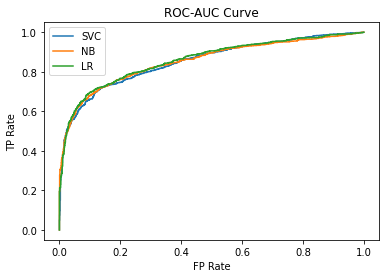

In [22]:
for i in range(len(models)):
    auc_roc = roc_auc_score(y_test, y_probs_clfs[i])
    fpr, tpr, _ = roc_curve(y_test, y_probs_clfs[i])
    plt.plot(fpr, tpr, label=models[i])
    print(models[i], 'ROC-AUC score: %.3f' % auc_roc)
    
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()


SVC f1: 0.740466, auc: 0.845
NB f1: 0.747706, auc: 0.854
LR f1: 0.758074, auc: 0.855


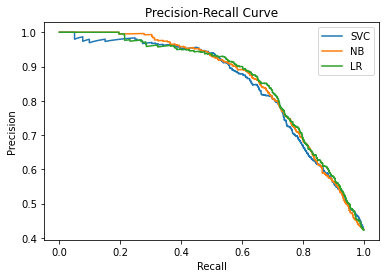

In [23]:
for i in range(len(models)):
    precision, recall, _ = precision_recall_curve(y_test, y_probs_clfs[i])
    f1 = f1_score(y_test, y_pred_clfs[i])
    auc_score = auc(recall, precision)
    print(models[i], 'f1: %3f, auc: %.3f' %(f1, auc_score) )
    
    plt.plot(recall, precision, label=models[i])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



Confusion matrix for: SVC


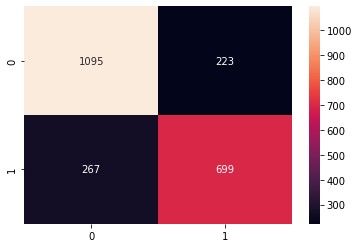

Confusion matrix for: NB


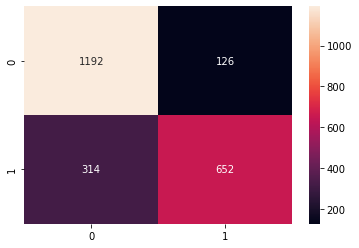

Confusion matrix for: LR


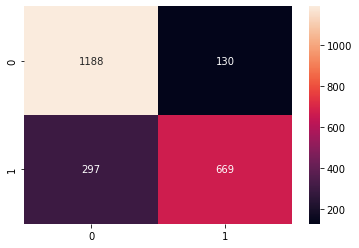

In [24]:
# Confusion matrix illustrating the hit rate of the model 
from sklearn.metrics import confusion_matrix
for i in range(len(models)):
    print('Confusion matrix for:', models[i])
    conf_mat = confusion_matrix(y_test, y_pred_clfs[i])
    sns.heatmap(conf_mat, annot=True, fmt='d')
    plt.show()

Given the accuracy, F1 and AUC scores, the TF-IDF model with a Logistic Regression classifier seems to work best in this case. While the performance is not significantly better than the other classifiers or even the bag of words model, it still had the highest accuracy at 81% and it's F1 and AUC scores were still higher than the other models. 

### Task 3 - Pre-trained Word Embeddings and Linear Classifier Model

In [25]:
glove_model = {}
with open("glove.twitter.27B.200d.txt",'r', encoding="utf-8") as f:
    for line in f:
        split_line = line.split()
        word = split_line[0]
        embedding = np.array(split_line[1:], dtype=np.float64)
        glove_model[word] = embedding

In [26]:
glove_model['<user>']
glove_model['<hashtag>']
glove_model['<number>']

len(glove_model)

1193514

For this task, I have decided to use the twitter glove embeddings (1193514 x 100) since they will be the most relevant considering our own dataset is composed of tweets. To create a single embedding, I will average over the word vectors, i.e. the *i*-th element in the single embedding will be the average over the *i*-th elements of all of the word vectors, as this is the simplest method of creating a single embedding of the entire sequence.

The glove twitter embeddings actually have a key for values such as hashtags, twitter handles, urls, etc. Rather than removing them as for the Bag of Words model and the TF-IDF model, we can convert them to their glove embedding key to maintain the context of the tweet.  


In [27]:
# Preprocess the text
X_proc_embed = train.copy()

def process_tweet(tweet):
    
    tweet = tweet.lower()
    
    tweet = re.sub(r'(http\S+)', '<url>', tweet)
    
    tweet = re.sub(r'(@\S+)', '<user>', tweet)
    
    tweet = re.sub(r'(#\S+)', '<hashtag>', tweet)
    
    tweet = re.sub(r'(\d+)', '<number>', tweet)
    
    tweet = re.sub(r"(')", '', tweet)
    
    tweet = re.sub(r'([^\x00-\x7F]+)', ' ', tweet)
    
    tweet = re.sub(r'(\s+)', ' ', tweet)
    
    return tweet

In [28]:
# process tweets 
X_proc_embed['text'] = X_proc_embed['text'].apply(lambda row: process_tweet(row))

# Split the data into train and test sets
X_embed = np.array(X_proc_embed['text'])
y_embed = np.array(X_processed['target'])
X_train_embed, X_test_embed, y_train_embed, y_test_embed = train_test_split(X_embed, y_embed, test_size = 0.3, random_state=42)


In [29]:
# Create an embedding vectorizer that will vectorize the text data using the pre-trained emebddings
class EmbeddingVectorizer():
    def __init__(self, model, embed_dim):
        self.word_vectors = model
        self.embed_dim = embed_dim
        
    def fit(self, words):
        pass
    
    def transform(self, docs):
        self.D = len(docs)
        
        X_embed = np.zeros((self.D, self.embed_dim))
        n=0

        # get the specific sentence
        for seq in docs:
            tokens = seq.split()
            vecs = []
            for tok in tokens:
                try: 
                    vec = self.word_vectors[tok]
                    vecs.append(vec)
                except KeyError:
                    pass
            # essentially ignore the word if it does not appear in the glove embeddings
            if len(vecs)==0:
                # will keep the 0-vector 
                pass
            else:
                vecs = np.array(vecs)
                X_embed[n] = vecs.mean(axis=0)
            n+=1
        return X_embed
    
    def fit_transform(self, docs):
        self.fit(docs)
        return self.transform(docs)

        

In [30]:
wordvec = EmbeddingVectorizer(glove_model, 200)

X_train_vec = wordvec.fit_transform(X_train_embed)
X_test_vec = wordvec.transform(X_test_embed)

# X_test_vec

In [31]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=100000, alpha=0.01, random_state=42)
# need to wrap the classifier in order to calculate the probabilities 
sgd_cal_clf = CalibratedClassifierCV(sgd)
sgd_cal_clf.fit(X_train_vec, y_train_embed)
y_pred_sgd = sgd_cal_clf.predict(X_test_vec)
y_probs_sgd = sgd_cal_clf.predict_proba(X_test_vec)[:,1]

print('Accuracy for SGD classifier using glove embeddings: %.3f' %metrics.accuracy_score(y_test_embed, y_pred_sgd))

Accuracy for SGD classifier using glove embeddings: 0.802


SGD ROC-AUC score: 0.858


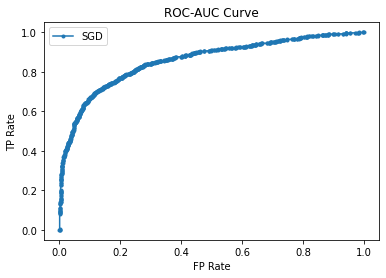

In [32]:
#y_probs = clf.predict_proba(X_test_bag)
sgd_auc_roc = roc_auc_score(y_test_embed, y_probs_sgd) 
print('SGD ROC-AUC score: %.3f' %sgd_auc_roc)

sgd_fpr, sgd_tpr, _ = roc_curve(y_test_embed, y_probs_sgd)

plt.plot(sgd_fpr, sgd_tpr, marker = '.', label='SGD')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

SGD f1: 0.749, auc: 0.839


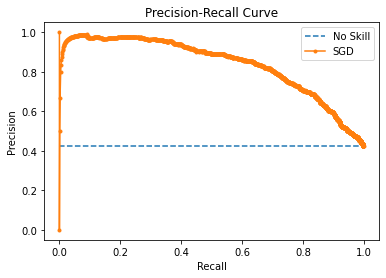

In [33]:
sgd_precision, sgd_recall, _ = precision_recall_curve(y_test_embed, y_probs_sgd)
sgd_f1 = f1_score(y_test_embed, y_pred_sgd) 
sgd_auc_score = auc(sgd_recall, sgd_precision)

print('SGD f1: %.3f, auc: %.3f' % (sgd_f1, sgd_auc_score))
no_skill = len(y_test_embed[y_test_embed==1])/len(y_test_embed)

plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(sgd_recall, sgd_precision, marker='.', label='SGD')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

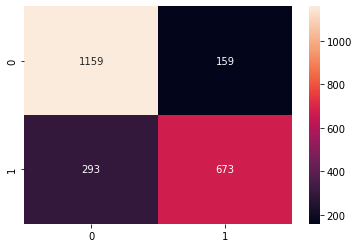

In [34]:
conf_mat = confusion_matrix(y_test_embed, y_pred_sgd)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.show()

Based on the accuracy, f1 score and AUC, the pre-trained word embeddings and the SGD linear classifier performed similarly to the other two models. 

### Task 4 - Recommendations to the clients 

Bag of Words - LR - accuracy: 0.800
Bag of Words - LR - accuracy: 0.813
Bag of Words - SGD - accuracy: 0.802


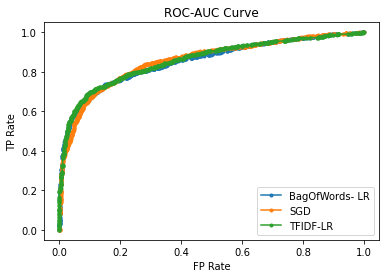

Bag of Words - LR - ROC-AUC score: 0.848
TFIDF - LR - ROC-AUC score: 0.860
Word Embeddings - SGD - ROC-AUC score: 0.858


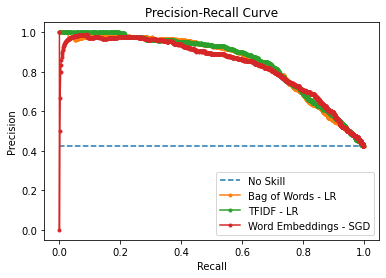

Bag of Words - LR - f1: 0.751, auc: 0.848
TFIDF - LR - f1: 0.758, auc: 0.855
Word Embeddings - SGD - f1: 0.749, auc: 0.839


In [35]:
# Print out all of the accuracies
print('Bag of Words - LR - accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred))
print('Bag of Words - LR - accuracy: %.3f' %accuracy_scores[2])
print('Bag of Words - SGD - accuracy: %.3f' %metrics.accuracy_score(y_test_embed, y_pred_sgd))

# Plot all ROC-AUC curves and their AUC scores
lr_auc_roc = roc_auc_score(y_test, y_probs_clfs[2]) 
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_probs_clfs[2])

plt.plot(lr_bag_fpr, lr_bag_tpr, marker = '.', label='BagOfWords- LR')
plt.plot(sgd_fpr, sgd_tpr, marker = '.', label='SGD')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='TFIDF-LR')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

# Print out all ROC-AUC scores
print('Bag of Words - LR - ROC-AUC score: %.3f' % lr_bag_auc)
print('TFIDF - LR - ROC-AUC score: %.3f' % lr_auc_roc)
print('Word Embeddings - SGD - ROC-AUC score: %.3f' % sgd_auc_roc)

# Plot out all precision-recall curves 

lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_probs_clfs[2])
lr_f1 = f1_score(y_test, y_pred_clfs[2])
lr_auc_score = auc(lr_recall, lr_precision)
#print(models[i], 'f1: %3f, auc: %.3f' %(lr_f1, lr_auc_score) )

no_skill = len(y_test[y_test==1])/len(y_test)

plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

plt.plot(lr_bag_recall, lr_bag_precision, marker='.', label='Bag of Words - LR')
plt.plot(lr_recall, lr_precision, marker='.', label='TFIDF - LR')
plt.plot(sgd_recall, sgd_precision, marker='.', label='Word Embeddings - SGD')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# print out f1 and auc scores for precision-recall curve
print('Bag of Words - LR - f1: %.3f, auc: %.3f' % (lr_bag_f1, lr_bag_auc))
print('TFIDF - LR - f1: %.3f, auc: %.3f' % (lr_f1, lr_auc_score))
print('Word Embeddings - SGD - f1: %.3f, auc: %.3f' % (sgd_f1, sgd_auc_score))


#### Recommendations
The three models that were evaluated for this task were the Bag of Words model, TF-IDF and a classifier (Logistic Regression), and pre-trained word embedding (glove twitter word embeddings) with a linear classifier (Stochastic Gradient Descent). 

Based on the accuracy alone, all three models performed very similarly to each other, with an accuracy of around 80%. There may be a few reasons for why there is very little change amongst all of the models. While the text has been preprocessed to remove links, twitter handles, etc., there still may be certain words or typos that are adding noise to the dataset. The labeling in this dataset may also be incorrect. A few of the tweets do not seem to relate to any real disaster, but are labeled 1 in the dataset. This may confuse the model as it is trained to recognize a non-disaster tweet as a real disaster tweet. Further pre-processing and a review of the labels for the dataset is recommended in order to improve performance. 

Given that the objective of this assignment is to find the simplest model that still gets the job done, the TF-IDF with a Logistic Regression classifier is likely the best choice. The Logistic Regression classifier returned an accuracy score of 81% and other relevant metrics for this model also ranked higher than the other models (as seen in the plots and scores above). While not as basic as a Bag of Words model, the TF-IDF used the same pre-processed text and is still relatively easy to implement. 

Based on the implementation in this notebook, the pre-trained word embeddings also is not fairly difficult to use. However, some of the advantages to using pre-trained word embeddings are that one does not need to create their own word embeddings and that the embeddings may contain more contextual data. As our objective is to classify text into one of two classes, the advantage of using word embeddings for context may not be as important and a TF-IDF model would likely suffice. 

For these reasons, the TF-IDF model with a Logistic Regression classifier is likely the best choice. To further improve the accuracy without developing more complex models or hypertuning parameters, a closer look at the text pre-processing should be done. An overview of the dataset's target labels should is also recommended in order to ensure the models are being trained on correctly labeled data. 
